# Buoy Analysis
By Electronick [Nick Velasquez]

August 31 2024


From Byoyant python library:

Buoyant
Buoyant is a Python wrapper for grabbing buoy data from the [National Buoy Data Center](http://www.ndbc.noaa.gov/). It parses CSV from the SDF endpoint and images from the BuoyCam service.

The NBDC provides a list and a map of active buoys.

- Buoy cam: https://www.ndbc.noaa.gov/buoycams.shtml



In [35]:
# !pip install buoyant

In [36]:
from buoyant import Buoy
buoy = Buoy('0Y2W3')
#buoy.air_pressure_at_sea_level

# buoyant library seems to be abandoned.
Testing NDBC-API library


- https://www.ndbc.noaa.gov/docs/ndbc_web_data_guide.pdf

In [37]:
# !pip install ndbc-api

In [38]:
from ndbc_api import NdbcApi

api = NdbcApi()

In [39]:
# get all stations and some metadata as a Pandas DataFrame
stations_df = api.stations()
# parse the response as a dictionary
stations_dict = api.stations(as_df=False)

In [40]:
stations_df

,Station,Lat,Lon,Elevation,Name,Owner,Program,Type,Includes Meteorology,Includes Currents,Includes Water Quality,DART Program
0,0y2w3,44.794,-87.313,179.0,"Sturgeon Bay CG Station, WI",U.S.C.G. Marine Reporting Stations,IOOS Partners,fixed,False,False,False,False
1,13001,12.000,-23.000,0.0,NE Extension,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False
2,13002,21.000,-23.000,0.0,NE Extension,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False
3,13008,15.000,-38.000,0.0,Reggae,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False
4,13009,8.000,-38.000,0.0,Lambada,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1343,yata2,59.548,-139.733,<NA>,"9453220 - Yakutat, Yakutat Bay, AK",NOS,NOS/CO-OPS,fixed,True,False,False,False
1344,ygnn6,43.262,-79.064,73.0,"Niagara Coast Guard Station, NY",NWS Eastern Region,IOOS Partners,fixed,True,False,False,False
1345,yktv2,37.227,-76.479,3.7,"8637689 - Yorktown USCG Training Center, VA",NOS,NOS/CO-OPS,fixed,True,False,False,False
1346,yrsv2,37.414,-76.712,11.0,"Taskinas Creek, Chesapeake Bay Reserve, VA",National Estuarine Research Reserve System,NERRS,fixed,True,False,False,False


In [41]:
stations_dict

{'Station': {0: '0y2w3',
  1: '13001',
  2: '13002',
  3: '13008',
  4: '13009',
  5: '13010',
  6: '14041',
  7: '14047',
  8: '14048',
  9: '14049',
  10: '15001',
  11: '15002',
  12: '15006',
  13: '15008',
  14: '15009',
  15: '1801593',
  16: '18ci3',
  17: '20cm4',
  18: '21413',
  19: '21414',
  20: '21415',
  21: '21416',
  22: '21418',
  23: '21419',
  24: '21420',
  25: '22101',
  26: '22102',
  27: '22103',
  28: '22104',
  29: '22105',
  30: '22106',
  31: '22107',
  32: '22108',
  33: '23001',
  34: '23003',
  35: '23004',
  36: '23006',
  37: '23007',
  38: '23008',
  39: '23009',
  40: '23010',
  41: '23011',
  42: '23012',
  43: '23013',
  44: '23014',
  45: '23015',
  46: '23016',
  47: '23019',
  48: '23217',
  49: '23218',
  50: '23219',
  51: '23223',
  52: '23226',
  53: '23227',
  54: '23228',
  55: '23401',
  56: '23461',
  57: '28401',
  58: '31001',
  59: '31002',
  60: '31003',
  61: '31004',
  62: '31005',
  63: '31006',
  64: '31007',
  65: '32068',
  66: '

In [42]:
# specify desired latitude and longitude
lat = '38.88N'
lon = '76.43W'

# find the station ID of the nearest NDBC station
nearest = api.nearest_station(lat=lat, lon=lon)
print(nearest)

tplm2


In [43]:
# specify desired latitude, longitude, radius, and units
lat = '38.88N'
lon = '76.43W'
radius = 100
units = 'km'

# find the station IDs of all NDBC stations within the radius
nearby_stations_df = api.radial_search(lat=lat, lon=lon, radius=radius, units=units)
nearby_stations_df

,Station,Lat,Lon,Elevation,Name,Owner,Program,Type,Includes Meteorology,Includes Currents,Includes Water Quality,DART Program,distance
1283,tplm2,38.899,-76.436,0.0,"Thomas Point, MD",NDBC,NDBC Meteorological/Ocean,fixed,True,False,False,False,2.177979
213,44063,38.963,-76.448,0.0,"Annapolis, MD",Chesapeake Bay Interpretive Buoy System (CBIBS),IOOS Partners,buoy,True,True,True,False,9.369909
625,apam2,38.983,-76.479,1.4,"8575512 - Annapolis, MD",NOS,NOS/CO-OPS,fixed,True,False,False,False,12.225590
733,cpvm2,38.995,-76.388,3.4,"8575437 - Chesapeake Bay Bridge Visibility, MD",NOAA NOS PORTS,NOS/CO-OPS,fixed,True,False,False,False,13.307985
681,bslm2,38.781,-76.708,0.3,"Jug Bay, Chesapeake Bay Reserve, MD",National Estuarine Research Reserve System,NERRS,fixed,True,False,False,False,26.506690
676,brim2,38.781,-76.714,<NA>,"Railroad, Chesapeake Bay Reserve, MD",National Estuarine Research Reserve System,NERRS,fixed,False,False,True,False,26.980756
207,44043,39.152,-76.391,0.0,"Patapsco, MD",Chesapeake Bay Interpretive Buoy System (CBIBS),IOOS Partners,buoy,True,True,True,False,30.465560
212,44062,38.556,-76.415,0.0,"Gooses Reef, MD",Chesapeake Bay Interpretive Buoy System (CBIBS),IOOS Partners,buoy,True,True,True,False,36.090262
861,hwpm2,39.214,-76.532,49.6,8574731 - Hawkins Point,NOAA NOS PORTS,NOS/CO-OPS,other,True,False,False,False,38.211312
810,fskm2,39.219,-76.528,4.4,"8574728 - Francis Scott Key Bridge, MD",NOAA NOS PORTS,NOS/CO-OPS,fixed,True,False,False,False,38.675800


In [44]:
# get staion metadata
tplm2_meta = api.station(station_id='tplm2')
# parse the response as a Pandas DataFrame
tplm2_df = api.station(station_id='tplm2', as_df=True)
tplm2_df

,0
Sea temp depth,1 m below MLLW
Barometer elevation,12.2 m above mean sea level
Anemometer height,18 m above site elevation
Air temp height,17.4 m above site elevation
Site elevation,0 m above mean sea level
Location,"38.899 N 76.436 W (38°53'56"" N 76°26'9"" W)"
Statation Type,Owned and maintained by National Data Buoy Cen...
Name,"Station TPLM2 - Thomas Point, MD"


In [45]:
# get all available realtime measurements, periods, and hyperlinks
tplm2_realtime = api.available_realtime(station_id='tplm2')
# parse the response as a Pandas DataFrame
tplm2_realtime_df = api.available_realtime(station_id='tplm2', as_df=True)
tplm2_realtime_df

,data directory,description,Real time standard meteorological data,Real time continuous winds data,Real time derived measurements data
Real time hourly standard meteorological,https://www.ndbc.noaa.gov/data/hourly2/,https://www.ndbc.noaa.gov/faq/measdes.shtml#cwind,NaN,NaN,NaN
Real time standard meteorological data,NaN,https://www.ndbc.noaa.gov/faq/measdes.shtml#st...,https://www.ndbc.noaa.gov/data/realtime2/TPLM2...,NaN,NaN
Real time continuous winds data,NaN,https://www.ndbc.noaa.gov/faq/measdes.shtml#cwind,NaN,https://www.ndbc.noaa.gov/data/realtime2/TPLM2...,NaN
Real time derived measurements data,NaN,https://www.ndbc.noaa.gov/faq/measdes.shtml#deriv,NaN,NaN,https://www.ndbc.noaa.gov/data/derived2/TPLM2.dmv


In [46]:
# get all available historical measurements, periods, and hyperlinks
tplm2_historical = api.available_historical(station_id='tplm2')
# parse the response as a Pandas DataFrame
tplm2_historical_df = api.available_historical(station_id='tplm2', as_df=True)
tplm2_historical_df

,Jan 2024,Feb 2024,Mar 2024,Apr 2024,May 2024,Jun 2024,Jul 2024,1985,1986,1987,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Standard meteorological data,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/data/stdmet/Jul/tplm...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...
Continuous winds data,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/data/cwind/Jul/tplm2...,NaN,NaN,NaN,...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...,https://www.ndbc.noaa.gov/download_data.php?fi...


In [47]:
# get the list of supported meterological measurement modes
modes = api.get_modes()
print(modes)

['adcp', 'cwind', 'ocean', 'spec', 'stdmet', 'supl', 'swden', 'swdir', 'swdir2', 'swr1', 'swr2']


In [48]:
# get all continuous wind measurements for station tplm2
cwind_df = api.get_data(
    station_id='tplm2',
    mode='cwind',
    start_time='2020-01-01',
    end_time='2022-09-15',
)
cwind_df

,WDIR,WSPD,GDR,GST,GTIME
timestamp,,,,,
2020-01-01 00:00:00,188.0,6.1,188.0,6.5,2355.0
2020-01-01 00:10:00,189.0,6.4,NaN,NaN,NaN
2020-01-01 00:20:00,193.0,6.1,NaN,NaN,NaN
2020-01-01 00:30:00,204.0,5.4,NaN,NaN,NaN
2020-01-01 00:40:00,233.0,5.2,NaN,NaN,NaN
...,...,...,...,...,...
2022-09-14 23:20:00,268.0,3.4,NaN,NaN,NaN
2022-09-14 23:30:00,255.0,3.6,NaN,NaN,NaN
2022-09-14 23:40:00,244.0,3.5,NaN,NaN,NaN


# General analysis

After playing with the basis of the library, the objective is to understand more the data, so we are going to analize it.

In [ ]:
# !pip install folium

In [50]:
from ndbc_api import NdbcApi

api = NdbcApi()

# get all stations and some metadata as a Pandas DataFrame
stations_df = api.stations()

In [51]:
stations_df.head()

,Station,Lat,Lon,Elevation,Name,Owner,Program,Type,Includes Meteorology,Includes Currents,Includes Water Quality,DART Program
0,0y2w3,44.794,-87.313,179.0,"Sturgeon Bay CG Station, WI",U.S.C.G. Marine Reporting Stations,IOOS Partners,fixed,False,False,False,False
1,13001,12.000,-23.000,0.0,NE Extension,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False
2,13002,21.000,-23.000,0.0,NE Extension,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False
3,13008,15.000,-38.000,0.0,Reggae,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False
4,13009,8.000,-38.000,0.0,Lambada,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False


In [52]:
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Station                 1348 non-null   object 
 1   Lat                     1348 non-null   float64
 2   Lon                     1348 non-null   float64
 3   Elevation               1085 non-null   object 
 4   Name                    1348 non-null   object 
 5   Owner                   1348 non-null   object 
 6   Program                 1348 non-null   object 
 7   Type                    1348 non-null   object 
 8   Includes Meteorology    1348 non-null   bool   
 9   Includes Currents       1348 non-null   bool   
 10  Includes Water Quality  1348 non-null   bool   
 11  DART Program            1348 non-null   bool   
dtypes: bool(4), float64(2), object(6)
memory usage: 89.6+ KB


In [53]:
stations_df.describe()

,Lat,Lon
count,1348.000000,1348.000000
mean,34.656119,-81.662224
std,17.631506,66.210597
min,-46.956000,-179.797000
25%,27.839500,-122.338750
50%,37.799500,-86.504000
75%,45.245250,-75.662750
max,71.315000,180.000000


In [54]:
stations_df.isnull().sum()

Station                     0
Lat                         0
Lon                         0
Elevation                 263
Name                        0
Owner                       0
Program                     0
Type                        0
Includes Meteorology        0
Includes Currents           0
Includes Water Quality      0
DART Program                0
dtype: int64

In [55]:
stations_df['Type'].unique()

array(['fixed', 'buoy', 'other', 'usv', 'dart', 'tao', 'oilrig'],
      dtype=object)

In [56]:
stations_df['Type'].value_counts()

Type
fixed     707
buoy      380
other      84
dart       74
oilrig     54
tao        48
usv         1
Name: count, dtype: int64

In [57]:
stations_df['Owner'].unique()

array(['U.S.C.G. Marine Reporting Stations',
       'Prediction and Research Moored Array in the Atlantic',
       'Research Moored Array for African-Asian-Australian Monsoon Analysis and Prediction',
       'NDBC', 'Korean Meteorological Administration',
       'Indian National Center for Ocean Information Services INDIA',
       'National Institute for Ocean Technology INDIA',
       'National Disaster Warning Center (NDWC), Department of Disaster Prevention and Mitigation, Ministry of the Interior, Thailand',
       'NOAA/PMEL',
       'Instituto Oceanografico y Antartico de la Armada (INOCAR)',
       'Hydrographic and Oceanographic Service of the Chilean Navy (SHOA)',
       'Cooperative Effort DART 4G', 'DIMAR Colombia',
       'Woods Hole Oceanographic Institution', 'CORMP',
       'Caribbean Integrated Coastal Ocean Observing System (CarICoos)',
       'NSF Ocean Observatories Initiative', 'SCRIPPS',
       'U.S. Army Corps of Engineers', 'Meteo France',
       'COMPS (Universi

In [58]:
stations_df['Program'].unique()

array(['IOOS Partners', 'International Partners',
       'NDBC Meteorological/Ocean', 'Tsunami', 'TAO', 'NOS/CO-OPS',
       'NERRS', 'Marine METAR'], dtype=object)

In [59]:
stations_df['Program'].value_counts()

Program
IOOS Partners                499
NOS/CO-OPS                   297
NDBC Meteorological/Ocean    147
International Partners       144
NERRS                        104
Tsunami                       74
TAO                           48
Marine METAR                  35
Name: count, dtype: int64

## Analyze just the 380 buoy availables

In [60]:
buoy_df = stations_df[stations_df['Type'] == 'buoy']

In [61]:
buoy_df.head()

,Station,Lat,Lon,Elevation,Name,Owner,Program,Type,Includes Meteorology,Includes Currents,Includes Water Quality,DART Program
1,13001,12.0,-23.0,0.0,NE Extension,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False
2,13002,21.0,-23.0,0.0,NE Extension,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False
3,13008,15.0,-38.0,0.0,Reggae,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False
4,13009,8.0,-38.0,0.0,Lambada,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False
5,13010,0.0,0.0,0.0,Soul,Prediction and Research Moored Array in the At...,International Partners,buoy,False,False,False,False


In [62]:
buoy_df['Owner'].value_counts()

Owner
SCRIPPS                                                                                          52
Environment and Climate Change Canada                                                            44
NDBC                                                                                             33
Research Moored Array for African-Asian-Australian Monsoon Analysis and Prediction               24
Pacific Islands Ocean Observing System                                                           22
Prediction and Research Moored Array in the Atlantic                                             17
CORMP                                                                                            16
Chesapeake Bay Interpretive Buoy System (CBIBS)                                                  10
U.S. Army Corps of Engineers                                                                     10
UK Met Office                                                                                 

In [63]:
buoy_df['Program'].value_counts()

Program
IOOS Partners                237
International Partners       109
NDBC Meteorological/Ocean     33
NOS/CO-OPS                     1
Name: count, dtype: int64

In [64]:
buoy_df['Includes Meteorology'].value_counts()

Includes Meteorology
True     278
False    102
Name: count, dtype: int64

In [65]:
buoy_df['Includes Currents'].value_counts()

Includes Currents
False    326
True      54
Name: count, dtype: int64

In [66]:
buoy_df['Includes Water Quality'].value_counts()

Includes Water Quality
False    331
True      49
Name: count, dtype: int64

In [67]:
buoy_df['DART Program'].value_counts()

DART Program
False    380
Name: count, dtype: int64

In [68]:
# Select only the boolean columns and summarize True and False counts
boolean_summary = buoy_df.drop(columns=['Station','Lat','Lon','Elevation','Name','Owner','Program','Type']).apply(lambda x: x.value_counts(), axis=0).fillna(0)	
# Optional: Rename the index for clarity
boolean_summary.index.name = 'Value'
boolean_summary = boolean_summary.rename(index={True: 'Count of True', False: 'Count of False'})

# Output the summary table
boolean_summary

,Includes Meteorology,Includes Currents,Includes Water Quality,DART Program
Value,,,,
Count of False,102,326,331,380.0
Count of True,278,54,49,0.0


In [ ]:
# !pip install seaborn
# !pip install matplotlib

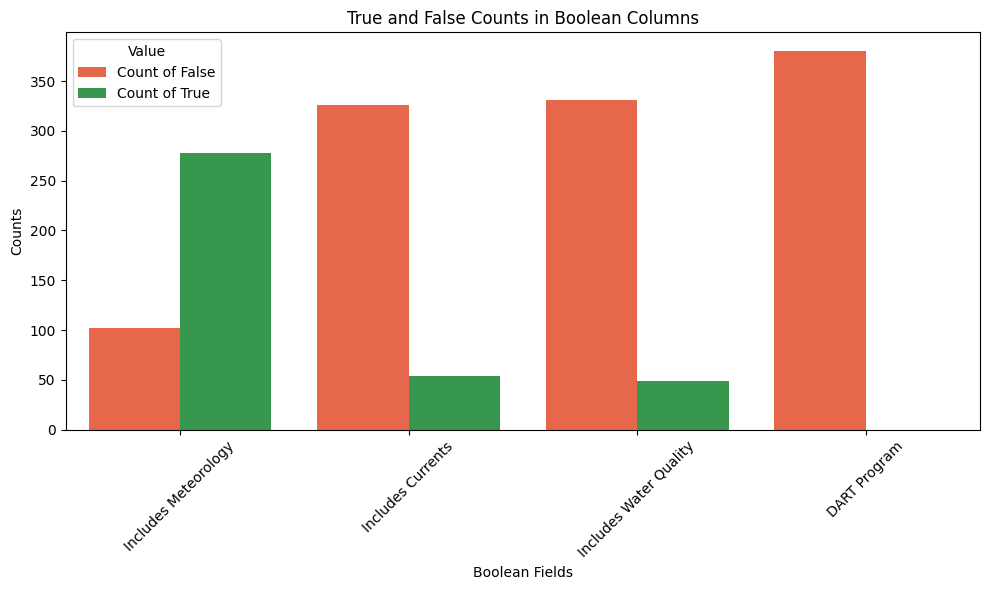

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to a format suitable for seaborn
boolean_summary_reset = boolean_summary.reset_index().melt(id_vars='Value', var_name='Field', value_name='Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=boolean_summary_reset, x='Field', y='Count', hue='Value', palette=["#FF5733", "#28A745"])  # Using red and green colors
plt.title('True and False Counts in Boolean Columns')
plt.xlabel('Boolean Fields')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Value')
plt.tight_layout()  # Adjust layout to improve fit
plt.show()

## Show all station locations

In [71]:
import folium

df = stations_df

# Create a base map
# You can set the center of the map to an average location, or a specific point
map_center = [df['Lat'].mean(), df['Lon'].mean()]
map = folium.Map(location=map_center, zoom_start=5)

# Define a color mapping based on station types
color_mapping = {
    'fixed': 'blue',
    'buoy': 'green',
    'other': 'orange',
    'dart': 'purple',
    'oilrig': 'red',
    'tao': 'pink',
    'usv': 'cyan'
}

for idx, row in stations_df.iterrows():
    marker_color = color_mapping.get(row['Type'], 'gray')  # Default to gray if type not found
    folium.Marker(
        location=[row['Lat'], row['Lon']],
        popup=row['Name'],
        icon=folium.Icon(color=marker_color)  # Set the marker color
    ).add_to(map)


C:\Users\nick\AppData\Local\Temp\ipykernel_805640\3231120231.py:26: UserWarning: color argument of Icon should be one of: {'orange', 'cadetblue', 'beige', 'darkgreen', 'pink', 'purple', 'gray', 'darkpurple', 'lightblue', 'lightred', 'white', 'black', 'red', 'darkblue', 'darkred', 'blue', 'green', 'lightgray', 'lightgreen'}.
  icon=folium.Icon(color=marker_color)  # Set the marker color


In [72]:
# Save map to an HTML file (or you can display it directly in a Jupyter Notebook)
map.save('map.html')

# If you're in a Jupyter Notebook, you can display it inline
map

## Show only Buoy locations

In [73]:
df = buoy_df

# Create a base map
# You can set the center of the map to an average location, or a specific point
map_center = [df['Lat'].mean(), df['Lon'].mean()]
buoy_map = folium.Map(location=map_center, zoom_start=5)



for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Lon']],
        popup=row['Name'],
    ).add_to(buoy_map)

# Save map to an HTML file (or you can display it directly in a Jupyter Notebook)
buoy_map.save('buoy_map.html')

# If you're in a Jupyter Notebook, you can display it inline
buoy_map

## Classify buoys based on the ocean

First show the ocean polygons

In [ ]:
!pip install shapely
!pip install geopandas

In [75]:
import folium
from shapely.geometry import Point, Polygon, mapping
import geopandas as gpd

# Define polygons for oceans
oceans = {
    "Arctic Ocean": Polygon([
        (-180, 66.56), (180, 66.56), (180, 90), (-180, 90)
    ]),
    
    "Southern Ocean": Polygon([
        (-180, -60), (180, -60), (180, -90), (-180, -90)
    ]),
    
    "Indian Ocean": Polygon([
        (20, -60), (146.82, -60), (146.82, -34.5), (120, -10.5), (98.88, 9.75), 
        (77.34, 10.38), (62.5, 25.5), (43.5, 12.5), (20, 30), (20, -60)
    ]),
    
    "South Atlantic Ocean": Polygon([
        (-70, -60), (20, -60), (20, 0), (3, 37), (-42, 37), (-70, 0), (-70, -60)
    ]),
    
    "North Atlantic Ocean": Polygon([
        (-42, 37), (3, 37), (20, 0), (20, 66.56), (-70, 66.56), (-70, 0), (-42, 37)
    ]),
    
    "South Pacific Ocean": Polygon([
        (146.82, -60), (-70, -60), (-70, 0), (-180, 0), (-180, -60), 
        (146.82, -60)
    ]),
    
    "North Pacific Ocean": Polygon([
        (120, -10.5), (146.82, -34.5), (146.82, 0), (180, 0), (180, 66.56), 
        (-180, 66.56), (-180, 0), (-70, 0), (-70, 25), (120, -10.5)
    ])
}

# Create a Folium map
map_center = [0, 0]  # Center of the world
m = folium.Map(location=map_center, zoom_start=2)

# Convert polygons to GeoJSON and add them to the map
for ocean_name, polygon in oceans.items():
    geojson = folium.GeoJson(
        data=mapping(polygon),  # Convert Shapely polygon to GeoJSON
        style_function=lambda feature: {
            'fillColor': 'blue' if ocean_name == "Arctic Ocean" else
                         'green' if ocean_name == "Southern Ocean" else
                         'orange' if ocean_name == "Indian Ocean" else
                         'red' if ocean_name == "South Atlantic Ocean" else
                         'purple' if ocean_name == "North Atlantic Ocean" else
                         'cyan' if ocean_name == "North Pacific Ocean" else
                         'pink' if ocean_name == "South Pacific Ocean" else
                         'gray',
            'color': 'black',  # Outline color for each polygon
            'weight': 2,
            'opacity': 0.6,
            'fillOpacity': 0.4,
        },
        name=ocean_name,
    )
    geojson.add_to(m)

# Add Layer Control
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('oceans_map.html')

m  # Uncomment this line if needed

Add ocean to buoys df

In [76]:
from shapely.geometry import Point, Polygon

# Define polygons for oceans (this is an illustrative example; you may want to use more precise coordinates)
o_definition = {
    "Arctic Ocean": Polygon([(0, 60), (180, 60), (180, 90), (0, 90), (-180, 90), (-180, 60)]),
    "Southern Ocean": Polygon([(0, -60), (180, -60), (180, -90), (0, -90), (-180, -90), (-180, -60)]),
    "Indian Ocean": Polygon([(-70, -60), (20, -60), (20, 30), (-70, 30)]),  # Define actual coordinates
    "South Atlantic Ocean": Polygon([(-70, -60), (-20, -60), (-20, 30), (-70, 30)]),  # Define actual coordinates
    "North Atlantic Ocean": Polygon([(-70, 30), (-20, 30), (-20, 60), (-70, 60)]),  # Define actual coordinates
    "North Pacific Ocean": Polygon([(20, 30), (180, 30), (180, 60), (20, 60)]),  # Define actual coordinates
    "South Pacific Ocean": Polygon([(-70, -60), (180, -60), (180, 30), (-70, 30)]),  # Define actual coordinates
}

def classify_ocean(lat, lon):
    point = Point(lon, lat)  # Note: Point takes (lon, lat)
    for ocean, polygon in o_definition.items():
        if polygon.contains(point):
            return ocean
    return "Unclassified Ocean"


buoy_df['Ocean'] = buoy_df.apply(lambda row: classify_ocean(row['Lat'], row['Lon']), axis=1)


C:\Users\nick\AppData\Local\Temp\ipykernel_805640\861989114.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buoy_df['Ocean'] = buoy_df.apply(lambda row: classify_ocean(row['Lat'], row['Lon']), axis=1)


Create map

In [77]:
# Function to assign colors based on the ocean category
def get_color(ocean):
    if ocean == "Arctic Ocean":
        return "blue"
    elif ocean == "Southern Ocean":
        return "green"
    elif ocean == "Indian Ocean":
        return "orange"
    elif ocean == "South Atlantic Ocean":
        return "red"
    elif ocean == "North Atlantic Ocean":
        return "purple"
    elif ocean == "North Pacific Ocean":
        return "cyan"
    elif ocean == "South Pacific Ocean":
        return "pink"
    else:
        return "gray"  # Default color for unclassified

# Create a Folium map centered at the average coordinates of the buoys
map_center = [buoy_df['Lat'].mean(), buoy_df['Lon'].mean()]
m = folium.Map(location=map_center, zoom_start=3)

# Add buoy markers to the map with colors based on the ocean classification
for _, buoy in buoy_df.iterrows():
    folium.CircleMarker(
        location=(buoy['Lat'], buoy['Lon']),
        radius=6,
        color=get_color(buoy['Ocean']),
        fill=True,
        fill_color=get_color(buoy['Ocean']),
        fill_opacity=0.6,
        popup=f"{buoy['Ocean']}\n{buoy['Name']}",
    ).add_to(m)

# Save the map to an HTML file
m.save('buoy_ocean_map.html')

m  # Uncomment this line if needed

## Improve ocean regions

In [78]:
!pip install geojson

Defaulting to user installation because normal site-packages is not writeable


In [79]:
import json
import folium

# Load the GeoJSON data from the file
with open('five-oceans2.geojson', 'r') as f:
    geojson_data = json.load(f)

# Create a Folium map centered around the average coordinates of the oceans
# Here I'm using [0, 0], but you may want to center it according to your data
m = folium.Map(location=[0, 0], zoom_start=2)

# Add the GeoJSON data to the Folium map
folium.GeoJson(
    geojson_data,
    name='Five Oceans',
    style_function=lambda feature: {
        'fillColor': 'blue',  # Color for the oceans
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.5,
    },
    tooltip=folium.GeoJsonTooltip(fields=('name',))  # Make sure there is a 'name' field in your GeoJSON
).add_to(m)

# Add Layer control
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('five_oceans_map.html')

m

# Start analizing actual data from the buoys

In [80]:
buoy_df.head()

,Station,Lat,Lon,Elevation,Name,Owner,Program,Type,Includes Meteorology,Includes Currents,Includes Water Quality,DART Program,Ocean
1,13001,12.0,-23.0,0.0,NE Extension,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False,Indian Ocean
2,13002,21.0,-23.0,0.0,NE Extension,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False,Indian Ocean
3,13008,15.0,-38.0,0.0,Reggae,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False,Indian Ocean
4,13009,8.0,-38.0,0.0,Lambada,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False,Indian Ocean
5,13010,0.0,0.0,0.0,Soul,Prediction and Research Moored Array in the At...,International Partners,buoy,False,False,False,False,Indian Ocean


In [86]:
buy_realtime = api.available_realtime(station_id='13001')
buy_realtime

{'Real time standard meteorological data': {'Real time standard meteorological data': 'https://www.ndbc.noaa.gov/data/realtime2/13001.txt',
  'description': 'https://www.ndbc.noaa.gov/faq/measdes.shtml#stdmet'}}

In [87]:
tplm2_historical = api.available_historical(station_id='13001')
tplm2_historical

{'Historical data': {'Historical data': 'https://www.ndbc.noaa.govhistorical_data.shtml',
  'data descriptions': 'https://www.ndbc.noaa.gov/faq/measdes.shtml'}}

In [90]:
modes = api.get_modes()
print(modes)

['adcp', 'cwind', 'ocean', 'spec', 'stdmet', 'supl', 'swden', 'swdir', 'swdir2', 'swr1', 'swr2']


In [102]:
cwind_df = api.get_data(
    station_ids=['13001','13002'],
    mode='stdmet',
    start_time='2023-09-01',
    end_time='2024-09-02',
)

cwind_df

,station_id,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,PTDY,TIDE
timestamp,,,,,,,,,,,,,,,
2024-07-20 00:00:00,13001,207.0,5.8,7.0,NaN,NaN,NaN,NaN,1016.3,26.2,27.6,NaN,NaN,NaN,NaN
2024-07-20 01:00:00,13001,220.0,6.3,7.5,NaN,NaN,NaN,NaN,1015.9,26.6,27.6,NaN,NaN,NaN,NaN
2024-07-20 02:00:00,13001,228.0,6.4,7.4,NaN,NaN,NaN,NaN,1015.3,26.7,27.5,NaN,NaN,NaN,NaN
2024-07-20 03:00:00,13001,217.0,7.0,9.1,NaN,NaN,NaN,NaN,1014.7,26.8,27.5,NaN,NaN,NaN,NaN
2024-07-20 04:00:00,13001,224.0,6.8,8.0,NaN,NaN,NaN,NaN,1014.6,26.8,27.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01 20:00:00,13002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.2,NaN,NaN,NaN,NaN
2024-09-01 21:00:00,13002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.2,NaN,NaN,NaN,NaN
2024-09-01 22:00:00,13002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.2,NaN,NaN,NaN,NaN


In [113]:
df = api.get_data(
    station_id='13001',
    mode='stdmet',
    start_time='2023-09-01',
    end_time='2024-09-02',
)
# Removing columns where all values are NaN
df = df.dropna(axis=1, how='all')

df

,WDIR,WSPD,GST,PRES,ATMP,WTMP
timestamp,,,,,,
2024-07-20 00:00:00,207,5.8,7.0,1016.3,26.2,27.6
2024-07-20 01:00:00,220,6.3,7.5,1015.9,26.6,27.6
2024-07-20 02:00:00,228,6.4,7.4,1015.3,26.7,27.5
2024-07-20 03:00:00,217,7.0,9.1,1014.7,26.8,27.5
2024-07-20 04:00:00,224,6.8,8.0,1014.6,26.8,27.4
...,...,...,...,...,...,...
2024-09-01 20:00:00,244,4.3,5.0,1011.4,27.8,28.3
2024-09-01 21:00:00,254,4.1,4.9,1012.3,27.9,28.2
2024-09-01 22:00:00,255,3.6,4.5,1013.1,28.0,28.3


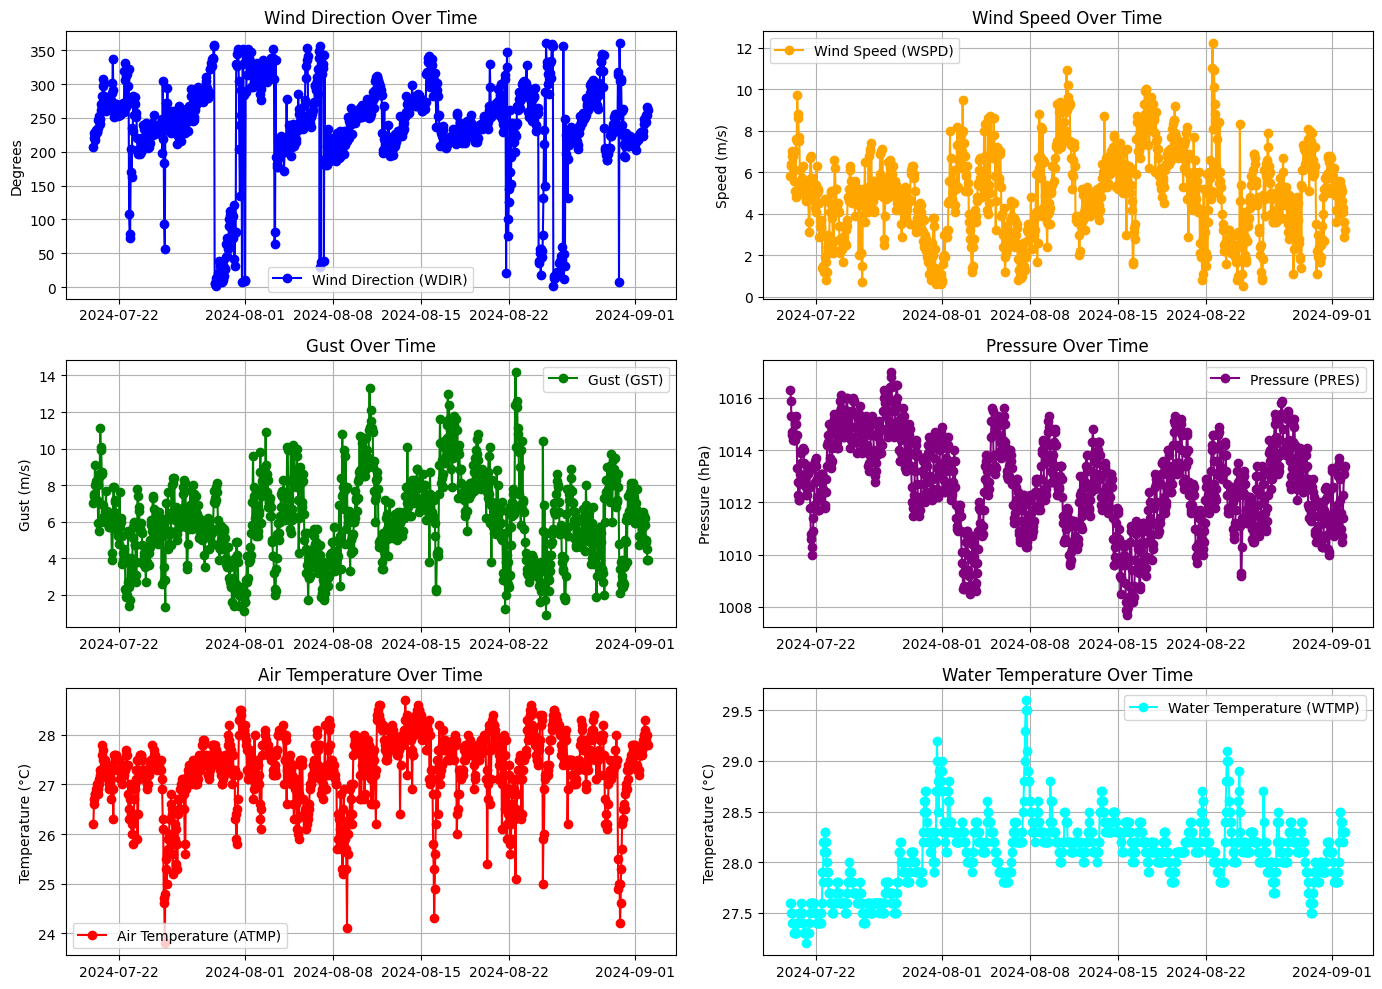

In [114]:
# Plotting all variables
plt.figure(figsize=(14, 10))

# Plotting each variable
plt.subplot(3, 2, 1)
plt.plot(df.index, df['WDIR'], label='Wind Direction (WDIR)', color='blue', marker='o')
plt.title('Wind Direction Over Time')
plt.ylabel('Degrees')
plt.grid()
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(df.index, df['WSPD'], label='Wind Speed (WSPD)', color='orange', marker='o')
plt.title('Wind Speed Over Time')
plt.ylabel('Speed (m/s)')
plt.grid()
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(df.index, df['GST'], label='Gust (GST)', color='green', marker='o')
plt.title('Gust Over Time')
plt.ylabel('Gust (m/s)')
plt.grid()
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(df.index, df['PRES'], label='Pressure (PRES)', color='purple', marker='o')
plt.title('Pressure Over Time')
plt.ylabel('Pressure (hPa)')
plt.grid()
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(df.index, df['ATMP'], label='Air Temperature (ATMP)', color='red', marker='o')
plt.title('Air Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(df.index, df['WTMP'], label='Water Temperature (WTMP)', color='cyan', marker='o')
plt.title('Water Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()